# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv('paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [58]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

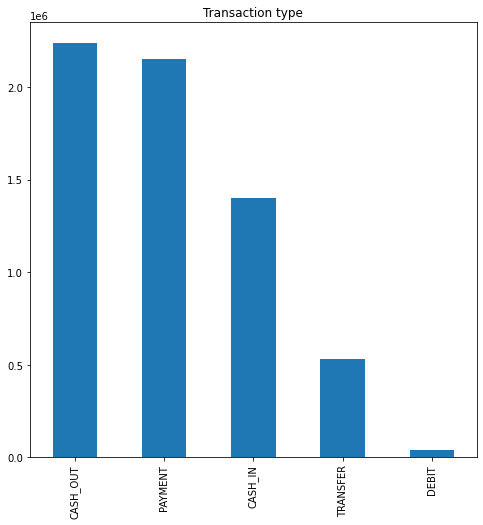

In [59]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

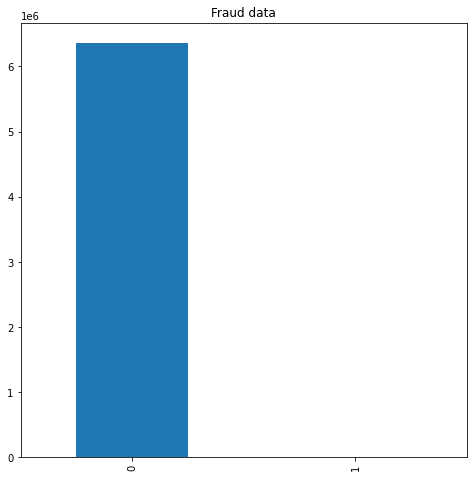

In [60]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="Fraud data", ax=ax, figsize=(8,8))
plt.show()

In [61]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [62]:
pd.crosstab(data.isFraud, data.isFlaggedFraud)


isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [63]:
# Highly unbalanced data between fraud and non fraud

In [64]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [65]:
# We can drop new balancesdue to high correlation with old balances
data.drop(['newbalanceOrig', 'newbalanceDest'], axis = 1, inplace = True)

### What is the distribution of the outcome? 

<AxesSubplot:xlabel='isFraud', ylabel='Count'>

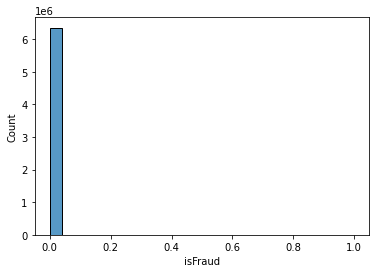

In [66]:
# Your response here
sns.histplot(data.isFraud)

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [67]:
# Your code here
# https://www.kaggle.com/datasets/ealaxi/paysim1
# Step is the number of hours since a certain point in time
# So we can use it for time

In [68]:
data.select_dtypes(include='object').nunique()

type              5
nameOrig    6353307
nameDest    2722362
dtype: int64

In [69]:
# Too many values in nameOrig and nameDest, let's drop them
data.drop(['nameOrig', 'nameDest'], axis = 1, inplace=True)

In [70]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,21182.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,0,0,0,0,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = data_dummies.drop(['isFraud', 'isFlaggedFraud'], axis = 1)
y = data_dummies.isFraud

lr = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

Confusion matrix on TRAIN


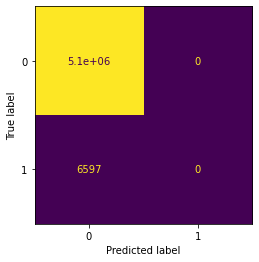

In [72]:
print('Confusion matrix on TRAIN')
ConfusionMatrixDisplay.from_predictions(y_train, lr.predict(X_train), colorbar=False)


Confusion matrix on TEST


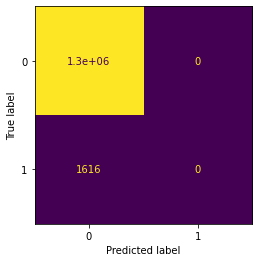

In [73]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(X_test), colorbar=False)

In [74]:
# Poor results, the model does not detect any fraud due to imbalance

### Now pick a model of your choice and evaluate its accuracy.

In [75]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TRAIN


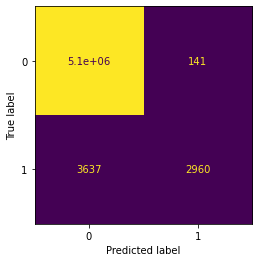

In [76]:
print('Confusion matrix on TRAIN')
ConfusionMatrixDisplay.from_predictions(y_train, dtc.predict(X_train), colorbar=False)

Confusion matrix on TEST


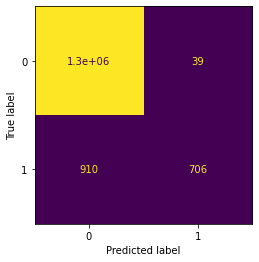

In [77]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test), colorbar=False)

### Which model worked better and how do you know?

In [78]:
# The DecisionTreeClassifier works much better as it detects some fraud (almost half of it)

### Let's use NearMiss method for undersampling and compare the results with previous

In [79]:
from collections import Counter
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_res_nm, y_train_res_nm = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res_nm))

Resampled dataset shape Counter({0: 6597, 1: 6597})


In [80]:
dtc.fit(X_train_res_nm, y_train_res_nm)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TEST


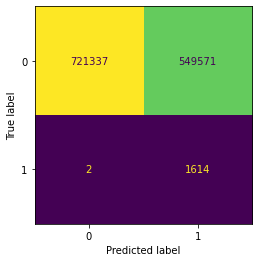

In [81]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test), colorbar=False)

In [82]:
# Now almost all frauds are detected, but a lot of false positives.

### And now let's apply SMOTE

In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_res_smote, y_train_res_smote = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res_smote))

Resampled dataset shape Counter({0: 5083499, 1: 5083499})


In [84]:
dtc.fit(X_train_res_smote, y_train_res_smote)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TEST


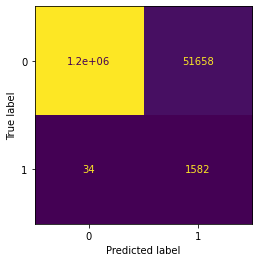

In [85]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test), colorbar=False)

### Apply your model on improved data

In [86]:
# Done above

### Calculate classification report for imbalanced data to evaluate the models

In [87]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, dtc.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.96      0.98      0.98      0.97      0.94   1270908
          1       0.03      0.98      0.96      0.06      0.97      0.94      1616

avg / total       1.00      0.96      0.98      0.98      0.97      0.94   1272524



### What is your conclusion?

In [88]:
# Very difficult to correct imbalance here
# The best way is to use SMOTE and then a DecisionTreeClassifier as it helps us detect almost all frauds
# with the most limited number of false positives (which still remains very high)